# DOMAIN : TRANSPORTATION

## SUBMITTED BY :GROUP 03-NEHA GRACE JOE, MUHAMMAD ASIF JALEEL, ARPITHA RAJ,                                                      SARATH K, GOPAKUMAR P

###### ABSTRACT:The aim of this ML model is to find out the flight fare for different Journey by considering some variables like destination,source,dep_time,arrival time etc...

### DATASET : Flight Price Prediction
DATASET DESCRIPTION 


Airline:Includes Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium                economy,Jet Airways Business,Vistara Premium economy,Trujet    

Date_of_Journey:Date of the Journey

Source:Departing point of the Journey

Destination:Arriving point of the Journey

Route:Path of the Journey

Dep_Time:Departure Time

Arrival_Time:Time of arrival

Total_Stops:Number of stops during Journey

Additional_Info:Additional Information

Price:Flight fare

Journey_day:Day of Journey

Journey_month:Month of Jourrney


## DATA COLLECTION

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
data= pd.read_excel('Flight_price.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302


In [3]:
#Finding the shape of the dataset(number of rows and columns) using shape. 
data.shape

(10683, 10)

In [4]:
#Finding the column names of our dataset
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [5]:
#Finding the datatypes of variables in our dataset
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [6]:
#Finding the summery for our dataset using info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


In [7]:
#Finding statistical values for our dataset
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [8]:
#Finding the presance of null values in our dataset using isna().sum() .
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Route and Total_Stops includes 1 missing values

## PREPROCESSING

### 1.Missing Value Handling

In [9]:
#Finding the presance of null values in our dataset using isna().sum() .
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We need to handle 2 missing values .Both Route and Total_Stops are categorical values.

In [10]:
#droping rows with null values
data.dropna(inplace = True)

In [11]:
#Finding the presence of null values in our dataset using isna().sum() .
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
data.shape

(10682, 10)

#### since date of journey column is objective data type, extracting month and date from dataframe using timestamp

In [13]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3


#### since dep time and arrival time are objective type we have to extract hour and min using timestamp

In [14]:
#dept_time
# Extracting Hours
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [15]:
#Arrival_time
# Extracting Hours
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour

# Extracting Minutes
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Total_Stops        0
Additional_Info    0
Price              0
Journey_day        0
Journey_month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
dtype: int64

## 2. Feature reduction

#### droping  columns date of journey, Arrival_time,Dept_time and Additional info ,Route


In [18]:
data.drop(['Date_of_Journey','Additional_Info','Dep_Time','Arrival_Time','Route'],axis=1,inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35


## 3.Encoding

#### since our data contains objective data types we have to use label encoding or hot encoding 
##### Nominal data --> data are not in any order --> OneHotEncoder is used in this case
##### Ordinal data --> data are in order --> LabelEncoder is used in this case

In [19]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [20]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = pd.get_dummies(data["Airline"], drop_first= True)

Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [21]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [22]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = pd.get_dummies(data["Source"], drop_first= True)

Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [23]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [24]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = pd.get_dummies(data["Destination"], drop_first = True)

Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [25]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [26]:
# As this is case of Ordinal Categorical type we perform LabelEncode
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
total_stops=label_en.fit_transform(data['Total_Stops'])
total_stops=pd.DataFrame(total_stops,columns=['total_stops'])
total_stops


,total_stops
0,4
1,1
2,1
3,0
4,0
...,...
10677,4
10678,4
10679,4
10680,4


In [27]:
data = pd.concat([data, Airline, Source,Destination,total_stops], axis = 1)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,total_stops
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,24.0,3.0,22.0,20.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
1,Air India,Kolkata,Banglore,2 stops,7662.0,1.0,5.0,5.0,50.0,13.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,9.0,6.0,9.0,25.0,4.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,12.0,5.0,18.0,5.0,23.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,1.0,3.0,16.0,50.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
data.reset_index(drop=True,inplace=True)

In [29]:
data.drop(["Airline", "Source", "Destination","Total_Stops"], axis = 1, inplace = True)
data.head()

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Air India,GoAir,IndiGo,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,total_stops
0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
1,7662.0,1.0,5.0,5.0,50.0,13.0,15.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,13882.0,9.0,6.0,9.0,25.0,4.0,25.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,6218.0,12.0,5.0,18.0,5.0,23.0,30.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13302.0,1.0,3.0,16.0,50.0,21.0,35.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
data.isna().sum()

Price                                1
Journey_day                          1
Journey_month                        1
Dep_hour                             1
Dep_min                              1
Arrival_hour                         1
Arrival_min                          1
Air India                            1
GoAir                                1
IndiGo                               1
Jet Airways                          1
Jet Airways Business                 1
Multiple carriers                    1
Multiple carriers Premium economy    1
SpiceJet                             1
Trujet                               1
Vistara                              1
Vistara Premium economy              1
Chennai                              1
Delhi                                1
Kolkata                              1
Mumbai                               1
Cochin                               1
Delhi                                1
Hyderabad                            1
Kolkata                  

In [31]:
data.dropna(inplace = True)

# EXPLORATORY DATA ANALYSIS

## 1.Univariate analysis

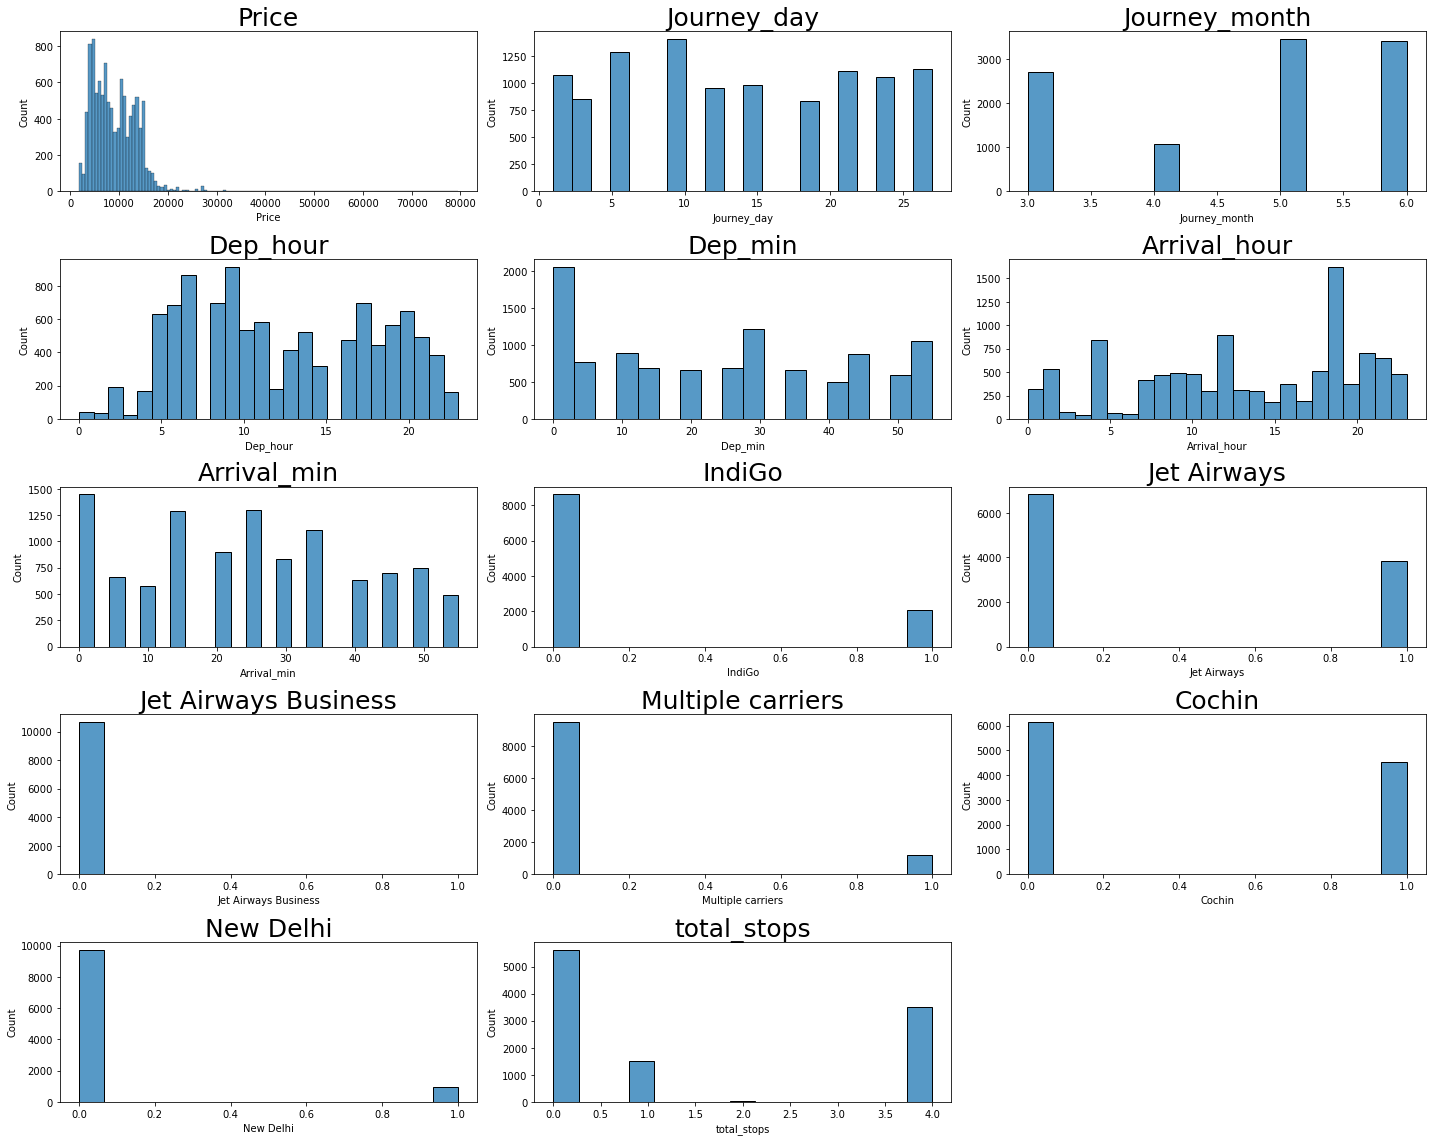

In [32]:
#frequency graph
columns=['Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min','Arrival_hour', 'Arrival_min', 'IndiGo', 'Jet Airways','Jet Airways Business', 'Multiple carriers', 'Cochin', 'New Delhi','total_stops']
plt.figure(figsize=(20,25))
for i in range(len(columns)):
 plt.subplot(8,3,i+1)
 sns.histplot(data[columns[i]],kde=False)
 plt.tight_layout()
 plt.title(columns[i],fontsize=25)
plt.show()


## 2.Bivariate Analysis

In [33]:
corrmatrix=data.corr()
plt.subplots(figsize=(150,150))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

<AxesSubplot:>

# MODELLING

In [34]:
#spilitting data 
y=data["Price"]
x=data.drop(["Price",],axis=1)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

### 1.Linear Regression

In [36]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,predictions))

MSE:  8638727.401944373


In [38]:
from sklearn.metrics import r2_score
print("R square value: ",r2_score(y_test,predictions))

R square value:  0.5727537630307518


### 2.Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
predictions=reg_rf.predict(x_test)

In [40]:
print("MSE: ",mean_squared_error(y_test,predictions))

MSE:  3633760.195831231


In [41]:
print("R square value: ",r2_score(y_test,predictions))

R square value:  0.8202848292946368


### 3.SVM Regressor

In [42]:
from sklearn.svm import SVR
svm= SVR(kernel='linear')
svm.fit(x_train, y_train)
predictions=svm.predict(x_test)

In [43]:
print("MSE: ",mean_squared_error(y_test,predictions))

MSE:  12107467.659303725


In [44]:
print("R square value: ",r2_score(y_test,predictions))

R square value:  0.4011999967147827


### 4.Decision Tree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
predictions=dt_model.predict(x_test)

In [46]:
print("MSE: ",mean_squared_error(y_test,predictions))

MSE:  5448865.381130871


In [47]:
print("R square value: ",r2_score(y_test,predictions))

R square value:  0.7305150259381731


###### From the above four models,we can conclude that Random Forest Regressor have best fit,since it has the least MSE Value and maximum R2 score value

## Feature Importance

In [48]:
pd.Series(reg_rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

total_stops                          29.269266
Journey_day                          14.059726
Jet Airways                           8.788046
Jet Airways Business                  7.908705
Journey_month                         5.845283
Arrival_hour                          5.218786
Dep_hour                              5.121471
IndiGo                                4.544322
Dep_min                               3.693814
Arrival_min                           3.086943
New Delhi                             2.539728
Multiple carriers                     1.743605
Delhi                                 1.338760
Cochin                                1.294792
Kolkata                               1.248036
Air India                             0.928830
Delhi                                 0.879319
SpiceJet                              0.853567
Vistara                               0.512407
Hyderabad                             0.409549
Mumbai                                0.382209
GoAir        

In [49]:
data.drop(['Delhi','Air India','SpiceJet','Vistara','Hyderabad','Mumbai','GoAir','Kolkata','Chennai','Multiple carriers Premium economy','Trujet','Vistara Premium economy'],axis=1,inplace=True)

In [50]:
#randomforestregressor
reg_rf.fit(x_train, y_train)
predictions=reg_rf.predict(x_test)
print("MSE: ",mean_squared_error(y_test,predictions))
print("R square value: ",r2_score(y_test,predictions))

MSE:  3580437.41632039
R square value:  0.8229220182960654


# MODEL FINE TUNING

In [51]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [52]:
print("MSE: ",mean_squared_error(y_test,predictions))
print("R square value: ",r2_score(y_test,predictions))

MSE:  3580437.41632039
R square value:  0.8229220182960654


## Conclusion

#### from the above models its evident that random forest model with hyper parameter tuning gives the best fit
#### it have the least MSE value(MSE=3580437.41632039) and maximum R square value (R-square- 0.8229220182960654)